<a href="https://colab.research.google.com/github/Rmejiaz/Feet_U-Net/blob/main/EntrenamientoModelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> HERRAMIENTA DE APOYO A LA PREDICCION DE LOS EFECTOS DE ANESTESICOS LOCALES VÍA NEUROAXIAL EPIDURAL A PARTIR DE TERMOGRAFÍA POR INFRARROJO </center>
<center> <h3> Sistema de Segmentación Semántica de Pies en Imágenes Termográficas usando Modelos de Aprendizaje Profundo </h3> </center>


<center>
<figure>
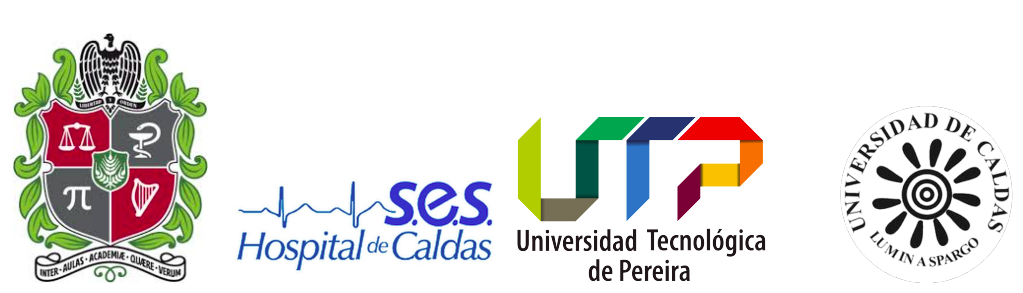 
<figcaption></figcaption>
<figure/>
<center/>

**<center>Grupo de Control y Procesamiento Digital de Señales</center>**

## Objetivos

### Objetivo General 

Desarrollar una herramienta de apoyo a la predicci ́on de los efectos de anest ́esicos locales v ́ıa neuroaxial
epidural a partir de termograf ́ıa por infrarrojo, mediante la extracci ́on de caracter ́ısticas discriminantes e
interpretables utilizando t ́ecnicas de visi ́on por computador, con el fin de mejorar la calidad en la atenci ́on
de pacientes obst ́etricas en el eje cafetero.





### Objetivo Específico

A partir de im ́agenes termogr ́aficas capturadas y utilizando técnicas de aprendizaje de máquina, desarrollar una metodología que extraiga en zonas de dermatomas los biomarcadores que sean suficientemente relevantes e interpretables en la predicción de la efectividad de los anest ́esicos locales en pacientes obstétricas.

## Planteaminto del Problema

En la planta del pie humano, se encuentran 5 regiones nerviosas: La Tibial, la cual luego se divide en la Plantar Medial y Plantar Lateral; la Sural; y la Safeno. El objetivo principal de la segmentación es lograr identificar estas 5 regiones para poder de manera automática extraer una lectura de temperatura de cada una.

<center>
<figure>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Gray834.svg/1200px-Gray834.svg.png' width="300"> 
<figcaption></figcaption>
<figure/>
<center/>

### Segmentación Semántica

A diferencia de otras tareas como la de clasificación y la de detección, el objetivo de la segmentación semántica es determinar exactamente que píxeles de una imagen componen diferentes clases, por lo que la salida del modelo es un arreglo del mismo tamaño de la imagen original, con una predicción para cada uno de los píxeles. 

En este caso, el objetivo es aplicar segmentación semántica a un conjunto de datos compuesto por imágenes termográficas de pies. Inicialmente se consideran solo dos clases, los pies y el fondo. 
<div>
<img src="https://ichi.pro/assets/images/max/724/0*QeOs5RvXlkbDkLOy.png" width="600"/>
</div>

### Arquitectura U-Net
La U-net saca su nombre debido a que su arquitectura tiene forma de U. La red empieza haciendo convoluciones con una matriz de 3x3, lo cual lleva a que se pierdan los pixeles del borde (Por eso las diemnsiones de la imagen se reducen en 2 en cada dimension cada vez que se hace esta operación), luego se realiza un maxpool de 2x2 lo cual reduce las dimensiones a la mitad. Este proceso se puede pensar como bajar de nivel Se repiten estos dos pasos n-veces para maximizar el "que" del objeto en lugar de el "donde".
## Arquitectura
<div>
<img src="https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png" width="600"/>
</div>
En la figura se ve una capa de dimensiones 572 x 572 x 1. Al realizar la primera convolución esta queda de dimensiones 570 x 570 x 64. El 64 se debe al numero de filtros, en otras palabras, se hizo la convolución 64 veces con 64 matrices diferentes.

## Convolución normal
<div>
<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" width="600"/>
</div>
La segunda mitad de la red consiste en hacer "up convolution", tambien conocido como "transposed convolution". En este proceso se aumentan las dimensiones de las imagen mientras se reduce el numero de capas. Este proceso se puede ver como subir de nivel. Cuando terminamos de hacer la up convolution, concatenamos las capas del mismo nivel. Realizamos más convoluciones y repetimos hasta llegar al nivel inicial, donde hacemos una ultima convolución de 1x1.

##Up Convolution
<div>
<img src="https://miro.medium.com/max/1904/1*faRskFzI7GtvNCLNeCN8cg.png" width="600"/>
</div>


## Códigos

### Definición de librerías y descarga del repositorio

In [ ]:
!git clone https://github.com/Rmejiaz/Feet_U-Net

Cloning into 'Feet_U-Net'...
remote: Enumerating objects: 971, done.
remote: Counting objects: 100% (971/971), done.
remote: Compressing objects: 100% (800/800), done.
remote: Total 971 (delta 308), reused 791 (delta 158), pack-reused 0
Receiving objects: 100% (971/971), 38.00 MiB | 11.99 MiB/s, done.
Resolving deltas: 100% (308/308), done.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from skimage.morphology import erosion, dilation

In [ ]:
%cd Feet_U-Net/U-Net/

/content/Feet_U-Net/U-Net


### Dataset


In [ ]:
!python download_dataset.py --id 1IXtHeATb8KsMzp-tEuLCdeMB57n1U_qQ

sed: -e expression #1, char 31: unterminated `s' command
--2022-03-03 14:24:56--  https://docs.google.com/uc?export=download&confirm=&id=1IXtHeATb8KsMzp-tEuLCdeMB57n1U_qQ
Resolving docs.google.com (docs.google.com)... 64.233.189.139, 64.233.189.113, 64.233.189.100, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/en64pfn7a5m4u2io1p0jm6mqeevps5t2/1646317425000/10854142796765961935/*/1IXtHeATb8KsMzp-tEuLCdeMB57n1U_qQ?e=download [following]
--2022-03-03 14:24:59--  https://doc-0g-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/en64pfn7a5m4u2io1p0jm6mqeevps5t2/1646317425000/10854142796765961935/*/1IXtHeATb8KsMzp-tEuLCdeMB57n1U_qQ?e=download
Resolving doc-0g-40-docs.googleusercontent.com (doc-0g-40-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Conn

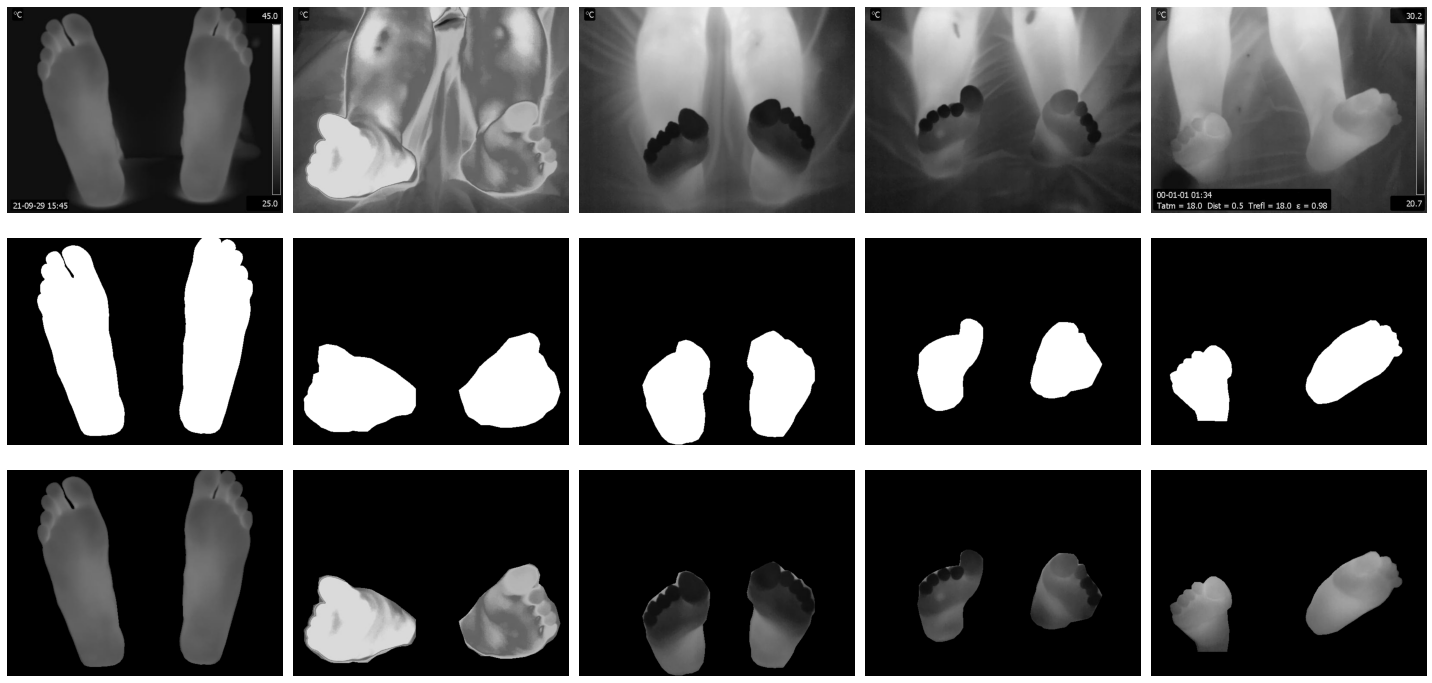

In [ ]:
import utils

X = utils.load_data('./Dataset_3/Train/JPEGImages', size = None, scale = False)
Y = utils.load_data('./Dataset_3/Train/SegmentationClass', size = None, scale = False)

Y = Y/Y.max()
Y[Y != 0] = 1

plt.figure(figsize = (20,10))
n_imgs = 5
for i in range(n_imgs):
    img = np.random.randint(X.shape[0])
    plt.subplot(3, n_imgs, i+1)
    plt.imshow(X[img,:,:,:])
    # plt.title("Input Image", fontsize = 15)
    plt.axis('off')

    plt.subplot(3, n_imgs, i+n_imgs+1)
    plt.imshow(Y[img,:,:,0], cmap='gray')
    # plt.title("Label (Ground Truth)", fontsize=15)
    plt.axis('off')

    plt.subplot(3, n_imgs, i+n_imgs*2 + 1)
    mask = np.copy(Y[img])
    mask[mask == 0] = 0
    plt.imshow((X[img]*mask).astype(int), cmap = 'gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

### Arquitecturas Disponibles


In [ ]:
from model import print_available_models
print_available_models()

Availaible models: 
	mobilenetv2
	fcn
	segnet
	unet
	vgg16


### Entrenamiento

#### Data Augmentation:

In [ ]:
!python augmentation.py --n_images 700 \
                        --img_path ./Dataset_3/Train/JPEGImages \
                        --masks_path ./Dataset_3/Train/SegmentationClass

Found 148 images belonging to 1 classes.
Found 148 images belonging to 1 classes.
Generating 704 images
1 / 22 done
2 / 22 done
3 / 22 done
4 / 22 done
5 / 22 done
6 / 22 done
7 / 22 done
8 / 22 done
9 / 22 done
10 / 22 done
11 / 22 done
12 / 22 done
13 / 22 done
14 / 22 done
15 / 22 done
16 / 22 done
17 / 22 done
18 / 22 done
19 / 22 done
20 / 22 done
21 / 22 done
22 / 22 done
Total ammount of images: 804


#### Entrenamiento del modelo

U-Net utilizando la arquitectura mobilenetv2 para el encoder con pesos pre-entrenados en imagenet.

In [ ]:
!python train.py --epochs 40 \
                 --batch_size 1 \
                 --imgs_path ./AugmentedDataset/JPEGImages \
                 --masks_path ./AugmentedDataset/SegmentationClass \
                 --val_split 0.2 \
                 --model mobilenetv2 

2022-03-03 15:53:24.638742: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0303 15:53:41.733861 139630861232000 mobilenet_v2.py:303] `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
2022-03-03 15:53:44.028495: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 387158016 exceeds 10% of free system memory.
Epoch 1/40
643/643 [==============================] - 22s 26ms/step - loss: 0.2229 - dice_coef: 0.7108 - iou_coef: 0.5708 - val_loss: 0.1804 - val_dice_coef: 0.7796 - val_iou_coef: 0.6489
Epoch 2/40
643/643 [==============================] - 16s 24ms/step - loss: 0.1306 - dice_coef: 0.8305 - iou_coef: 0.7196 - val_loss: 0.1420 - val_dice_coef: 0.8230 - val_iou_coef: 0.7102
Epoch 3/40
643/643 [==============================] 

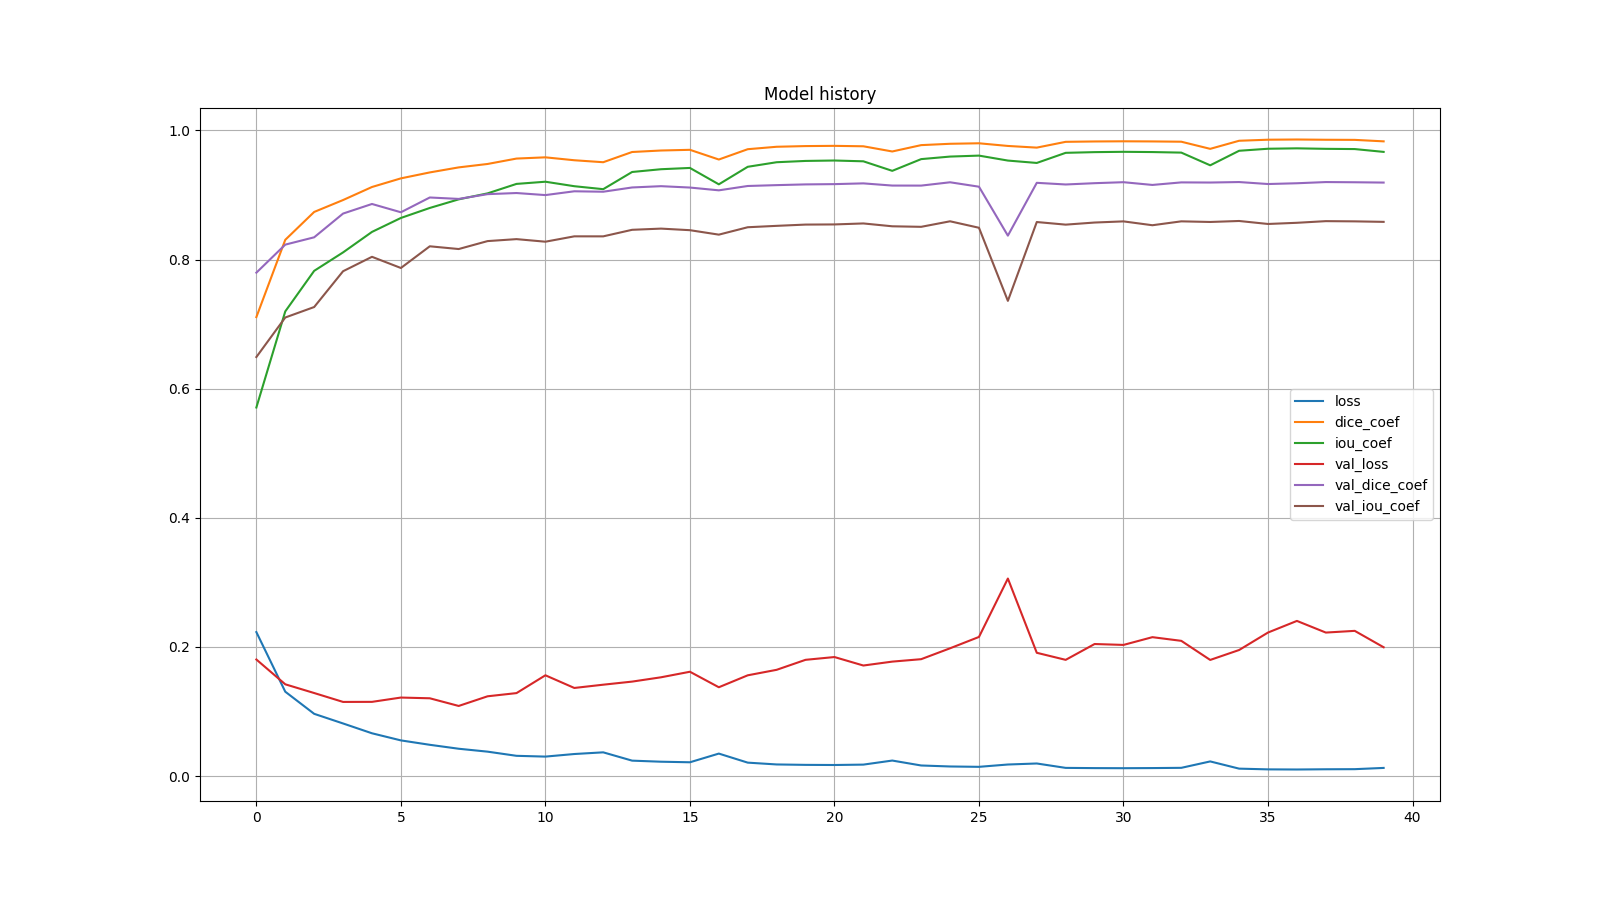

In [ ]:
from IPython.display import Image
Image('./results/history0.png')

#### Evaluación del modelo

El problema que se está trabajando es muy desbalanceado por naturaleza, pues gran parte de la imagen corresponde al fondo. Es por esto que es necesario usar métricas diferentes al accuracy para poder medir el rendimiento del modelo. Las métricas más utilizadas en segmentación semántica son el Dice y el Jaccard.

$Dice = \frac{2|A \cap B|}{|A| + |B|} = \frac{2 TP}{2TP + FP + FN}$

<div>
<img src="https://miro.medium.com/max/429/1*yUd5ckecHjWZf6hGrdlwzA.png" width="160"/>
</div>

$Jaccard (IoU) = \frac{|A \cap B|}{|A \cup B|} = \frac{|A \cap B|}{|A| + |B| - |A \cap B|} = \frac{TP}{FN + FP + TP}$

<div>
<img src="https://miro.medium.com/max/300/0*kraYHnYpoJOhaMzq.png" width="160"/>
</div>


(Ver https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99639aa2)

A continuación se calcula el dice y el jaccard al modelo anteriormente entrenado sobre el conjunto de test.

In [ ]:
!python evaluate.py --model_path ./results/Model.h5 \
                    --test_images ./Dataset_3/Test/JPEGImages/ \
                    --test_masks ./Dataset_3/Test/SegmentationClass/

2022-03-03 16:05:00.305165: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
╒════════════════════════════════╤══════════════╤═════════════════╤═══════════════╤═══════════════╤══════════════╕
│ Segmentation                   │ Dice         │ Jaccard (IoU)   │ Specificity   │ Sensitivity   │ Precision    │
╞════════════════════════════════╪══════════════╪═════════════════╪═══════════════╪═══════════════╪══════════════╡
│ U-Net Mobilenetv2              │ 96.43 ± 1.13 │ 93.14 ± 2.09    │ 98.32 ± 0.96  │ 95.66 ± 1.79  │ 97.26 ± 1.53 │
├────────────────────────────────┼──────────────┼─────────────────┼───────────────┼───────────────┼──────────────┤
│ U-Net Mobilenetv2 + Refinement │ 97.13 ± 1.04 │ 94.45 ± 1.94    │ 99.22 ± 0.2   │ 95.65 ± 1.91  │ 98.69 ± 0.37 │
╘════════════════════════════════╧══════════════╧═════════════════╧═══════════════╧═════════

### Inferencia

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t0.jpg
Dice: 0.9356898547332007
Jaccard: 0.8791514944157971


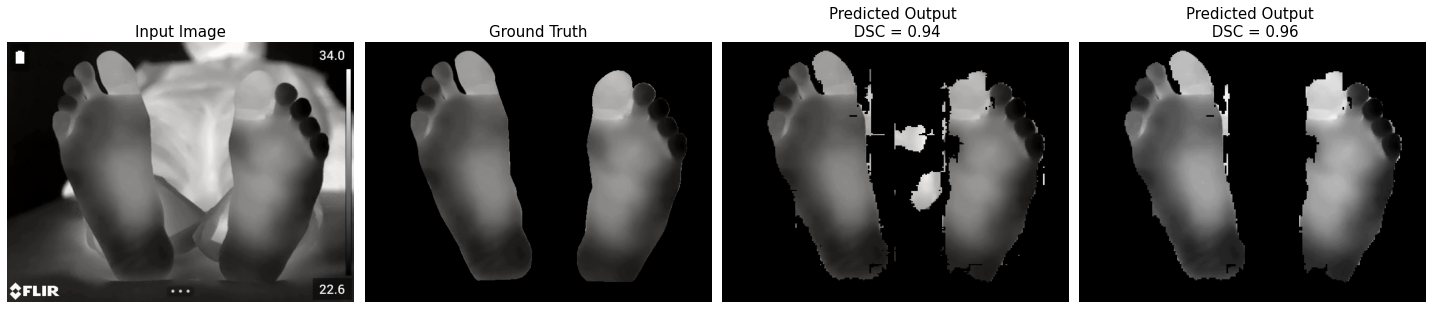

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t1.jpg
Dice: 0.9533646541646051
Jaccard: 0.9108852074966532


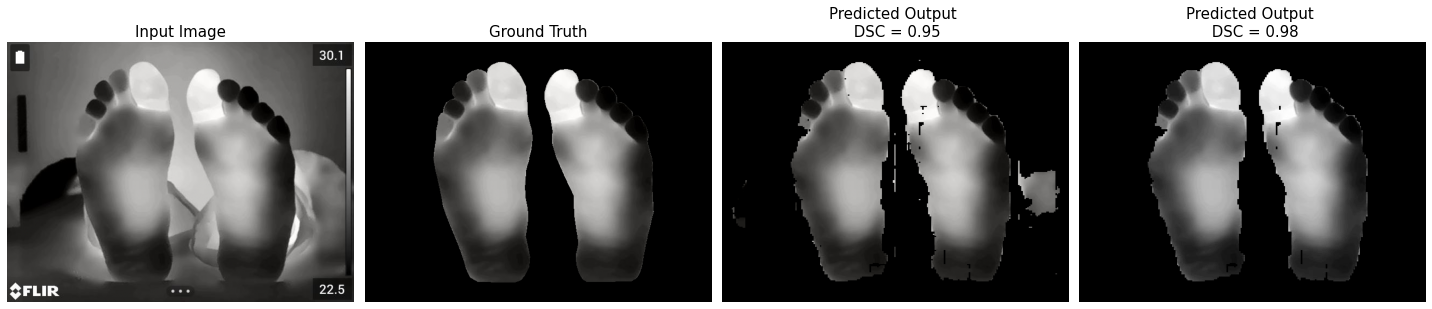

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t10.jpg
Dice: 0.9673285464269942
Jaccard: 0.9367243987234009


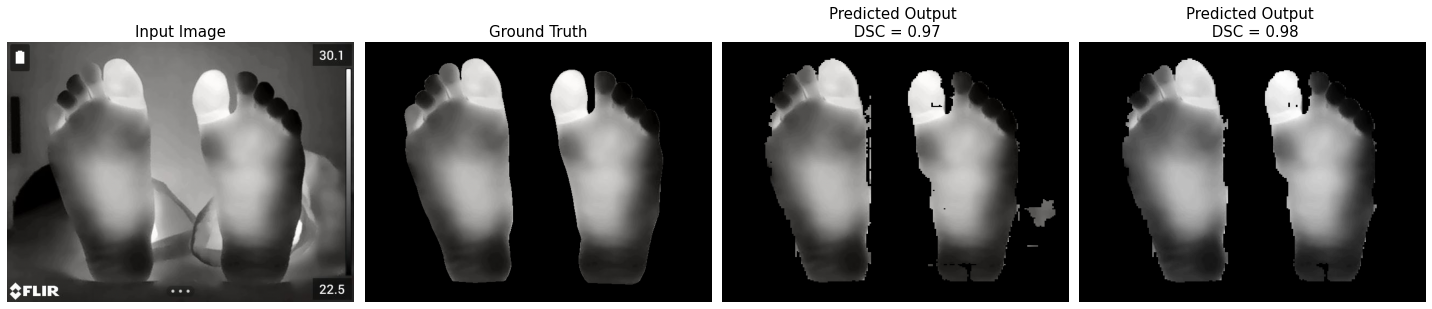

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t15.jpg
Dice: 0.9571830870110383
Jaccard: 0.9178822045257431


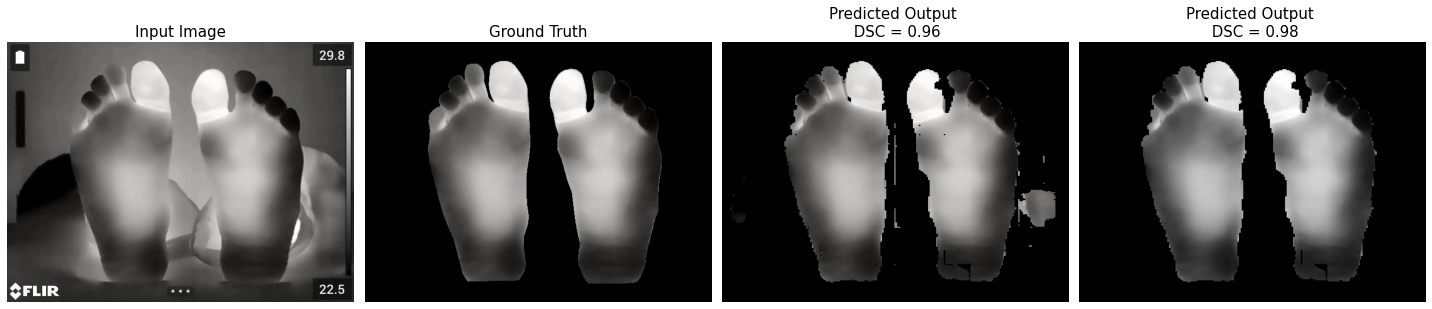

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t20.jpg
Dice: 0.9411790111992675
Jaccard: 0.8888934212243832


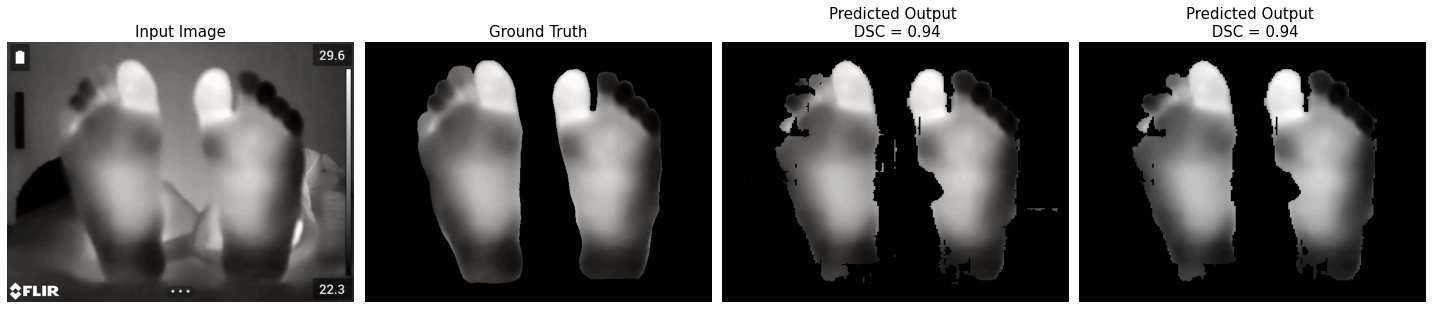

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t25.jpg
Dice: 0.9711688996555758
Jaccard: 0.9439536764882549


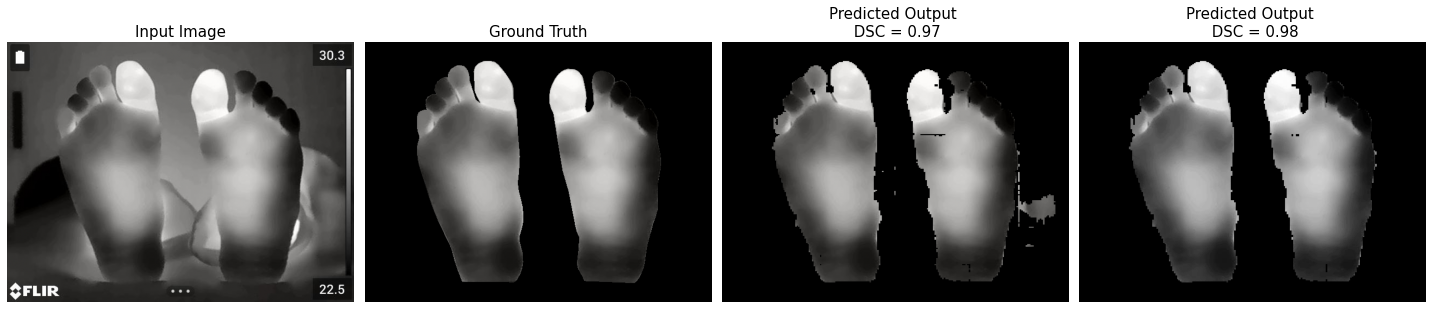

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t30.jpg
Dice: 0.9786936229951507
Jaccard: 0.9582762283981153


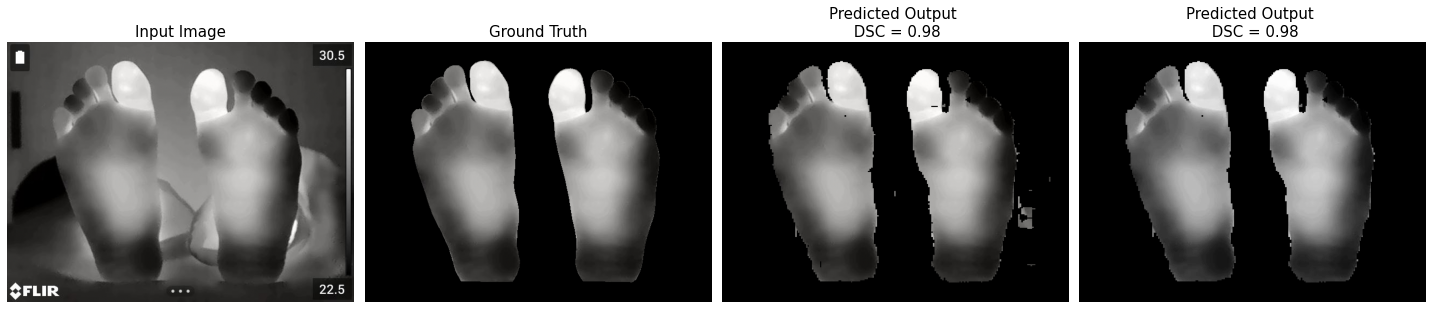

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t35.jpg
Dice: 0.9718591267307399
Jaccard: 0.945258720860346


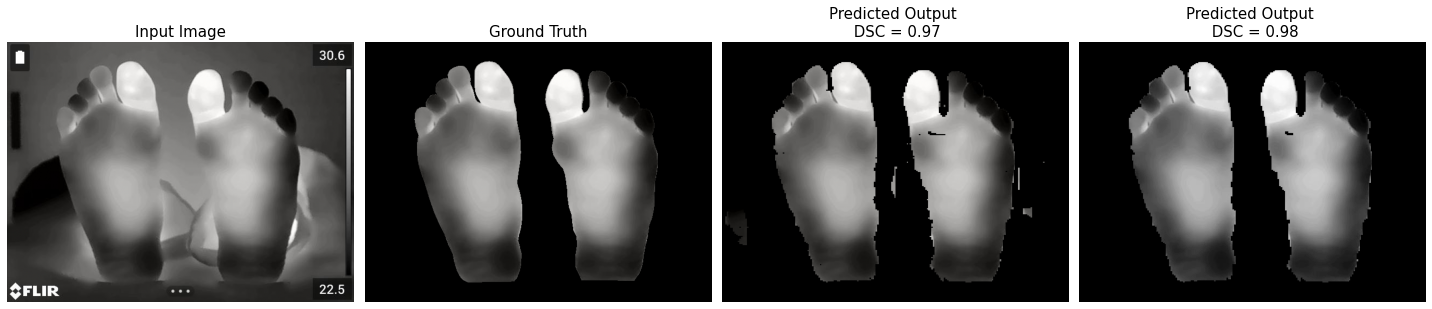

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t40.jpg
Dice: 0.9722545328713953
Jaccard: 0.9460071233276812


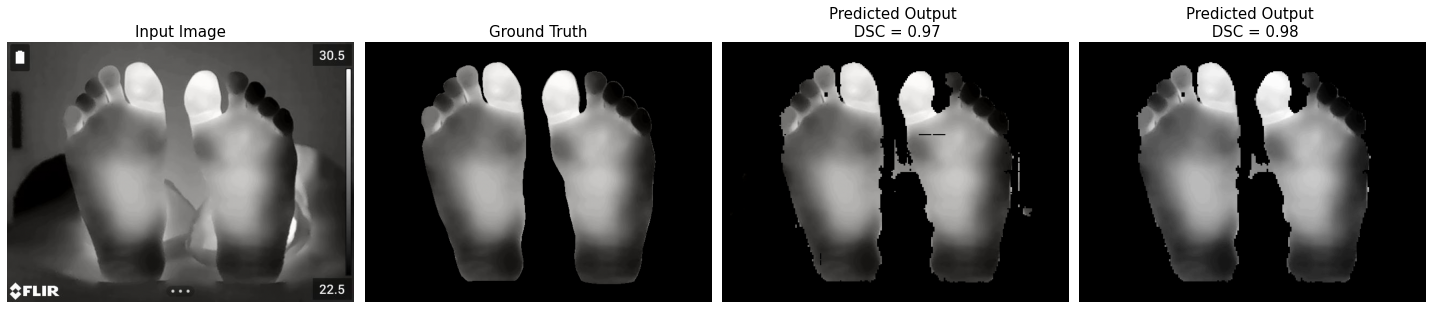

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t45.jpg
Dice: 0.9709360509724122
Jaccard: 0.9435138135874807


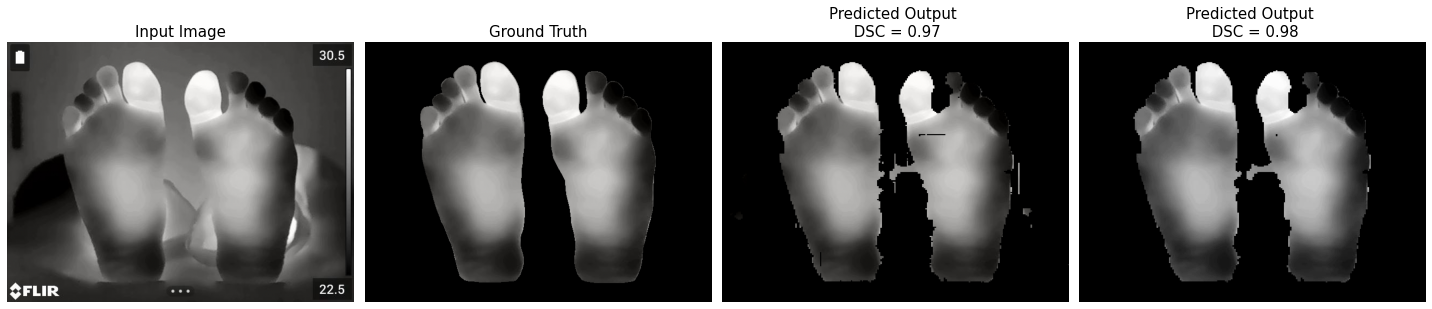

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t5.jpg
Dice: 0.9690209935564331
Jaccard: 0.9399037104539479


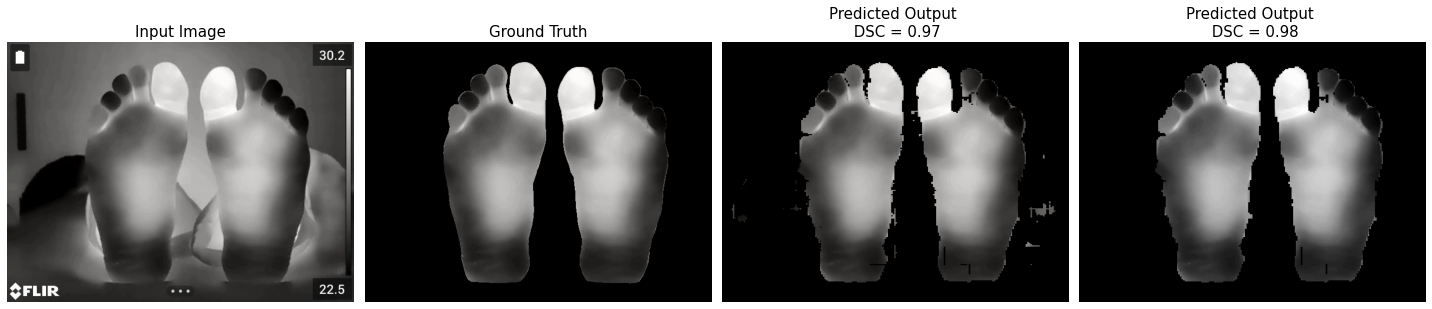

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t50.jpg
Dice: 0.9723433271090783
Jaccard: 0.9461752672453921


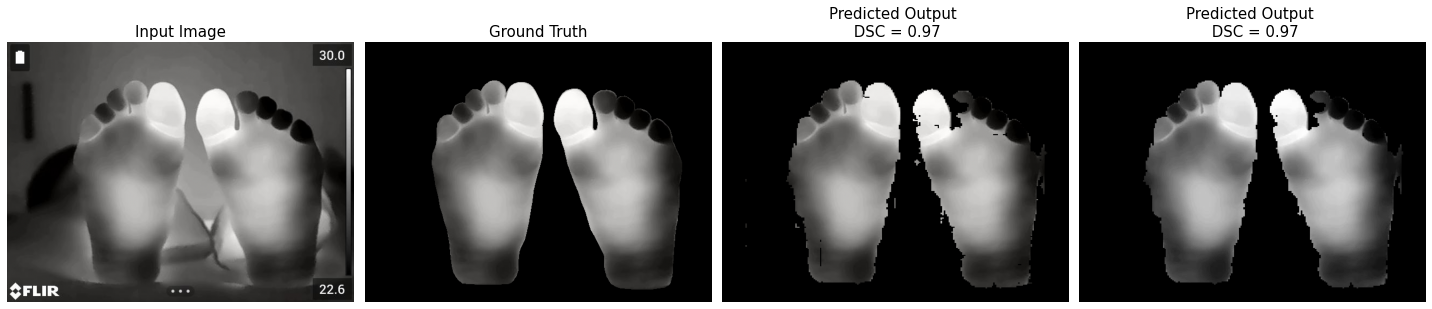

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t55.jpg
Dice: 0.9695846515296732
Jaccard: 0.9409648769004091


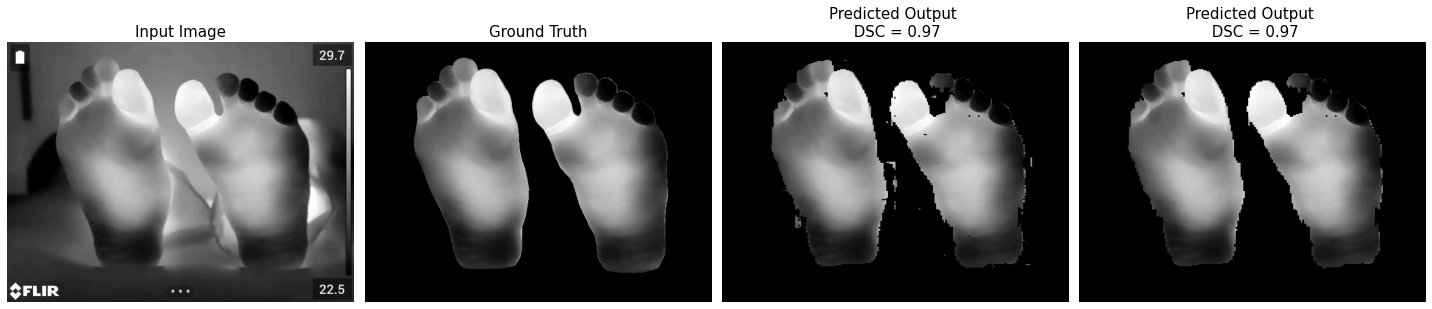

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t60.jpg
Dice: 0.974215022835329
Jaccard: 0.9497263505731148


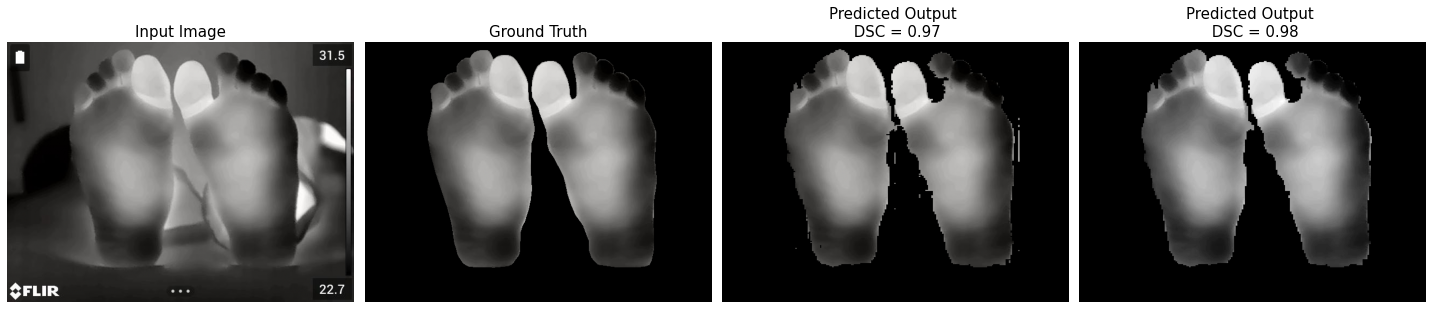

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t65.jpg
Dice: 0.9694450995136668
Jaccard: 0.940702042226156


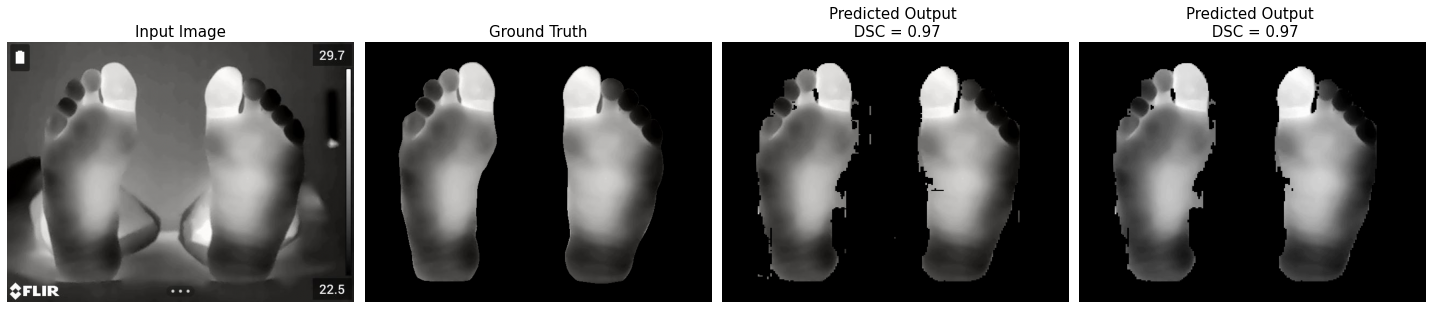

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t70.jpg
Dice: 0.9687975287416042
Jaccard: 0.9394833272260902


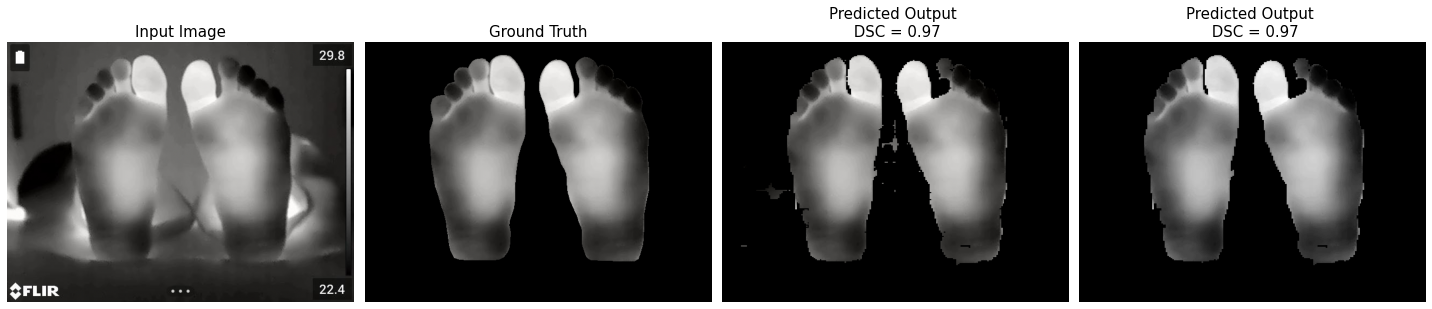

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t75.jpg
Dice: 0.9551511165064979
Jaccard: 0.9141524019367322


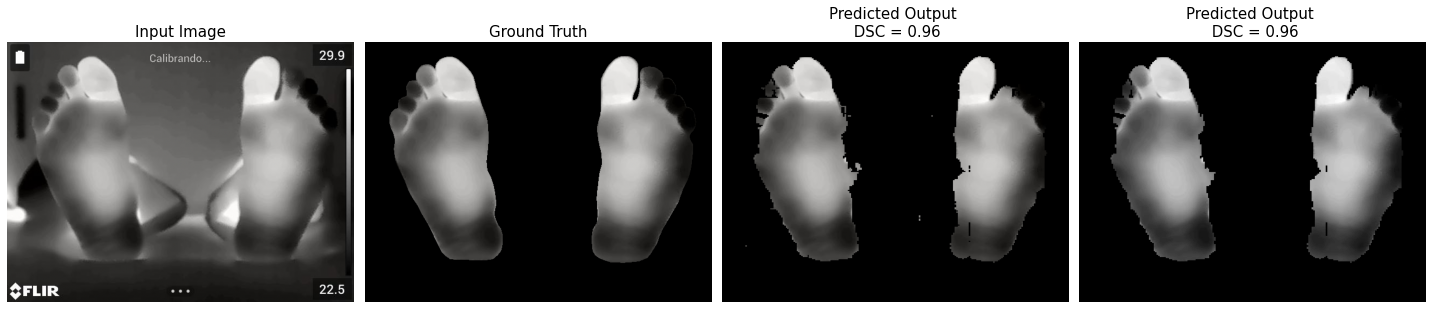

Displaying ./Dataset_3/Test/JPEGImages/marcos_loaiza_t80.jpg
Dice: 0.9599832494977342
Jaccard: 0.923045950013901


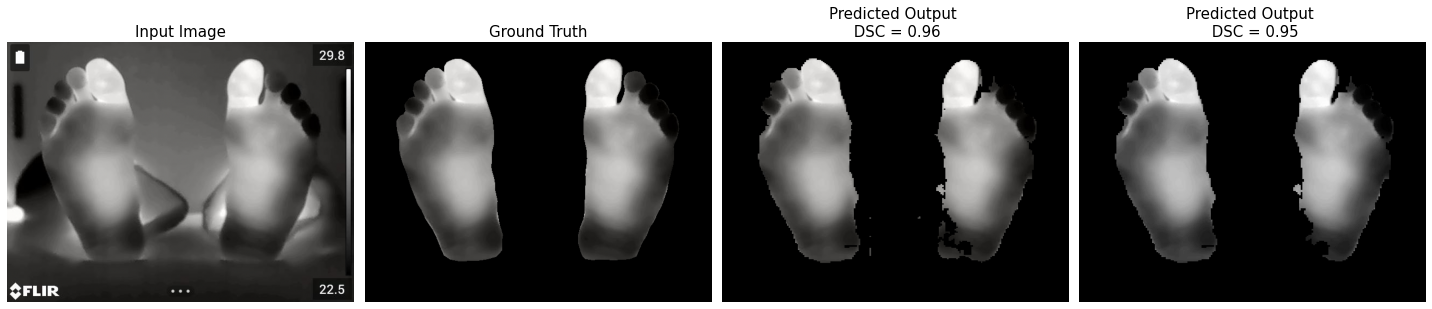

In [ ]:
import logging
logging.getLogger('tensorflow').disabled = True
from functools import partial


steps = [partial(utils.opening,diameter=4),
            partial(utils.remove_small_objects,connectivity=4),
            partial(utils.closing,diameter=4),
         ]

images_path = './Dataset_3/Test/JPEGImages' 
masks_path = './Dataset_3/Test/SegmentationClass'
imgs = os.listdir(images_path)
imgs.sort()
n = np.random.randint(len(imgs))

weights_path = './weights'


img_size = 224

model = tf.keras.models.load_model('./results/Model.h5', custom_objects={'dice_coef':utils.dice_coef, 'iou_coef': utils.iou_coef})
DiceList = []
JList = []
for n in range(len(imgs)):
    img_path = os.path.join(images_path, imgs[n])
    mask_path = os.path.join(masks_path, f"{imgs[n][:-3]}png")
   
    # Read the image
    img = plt.imread(img_path)/255.
    X = tf.convert_to_tensor(img)
    X = tf.image.resize(X,(img_size,img_size))
    X = tf.expand_dims(X,0)

    Y = plt.imread(mask_path)[:,:,0]

    # Make the prediction
    threshold = 0.5
    Y_pred = model.predict(X)   
    Y_pred = Y_pred/Y_pred.max()
    Y_pred = np.where(Y_pred>=threshold,1,0)
    # Resize
    Y_pred = cv2.resize(Y_pred[0], (img.shape[1],img.shape[0]), interpolation = cv2.INTER_NEAREST) # Resize the prediction to have the same dimensions as the input
    Dice = utils.DiceSimilarity(Y, Y_pred)
    DiceList += [Dice]
    Jaccard = utils.jaccard(Y, Y_pred)
    JList += [Jaccard]
    print(f"Displaying {img_path}\nDice: {Dice}\nJaccard: {Jaccard}")

    # Apply postprocessing

    Y_pred_post = utils.posprocessing(Y_pred, steps)

    Dice2 = utils.DiceSimilarity(Y, Y_pred_post[0,...,0])

    plt.figure(figsize=(20,9))

    if (img.shape[-1] == 3):
        mask = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
        pred_mask = np.copy(mask)
        mask[:,:,0] = mask[:,:,1] = mask[:,:,2] = Y[:,:]
        pred_mask[:,:,0] = pred_mask[:,:,1] = pred_mask[:,:,2] = Y_pred[:,:]
    else:
        mask = Y
        pred_mask = Y_pred

    plt.subplot(141)
    plt.imshow(img)
    plt.title("Input Image", fontsize=15)
    plt.axis('off')

    plt.subplot(142)
    plt.imshow(img*mask,cmap='gray')
    plt.title("Ground Truth",fontsize=15)
    plt.axis('off')

    plt.subplot(143)
    plt.imshow(img*pred_mask,cmap='gray')
    plt.title(f"Predicted Output \n DSC = {np.round(Dice,2)}",fontsize=15)
    plt.axis('off')

    plt.subplot(144)
    plt.imshow((img*Y_pred_post)[0,...,0],cmap='gray')
    plt.title(f"Predicted Output \n DSC = {np.round(Dice2,2)}",fontsize=15)
    plt.axis('off')



    plt.tight_layout()
    plt.show()

0.9542347966701844 0.9130195540185908
0.908392543457172


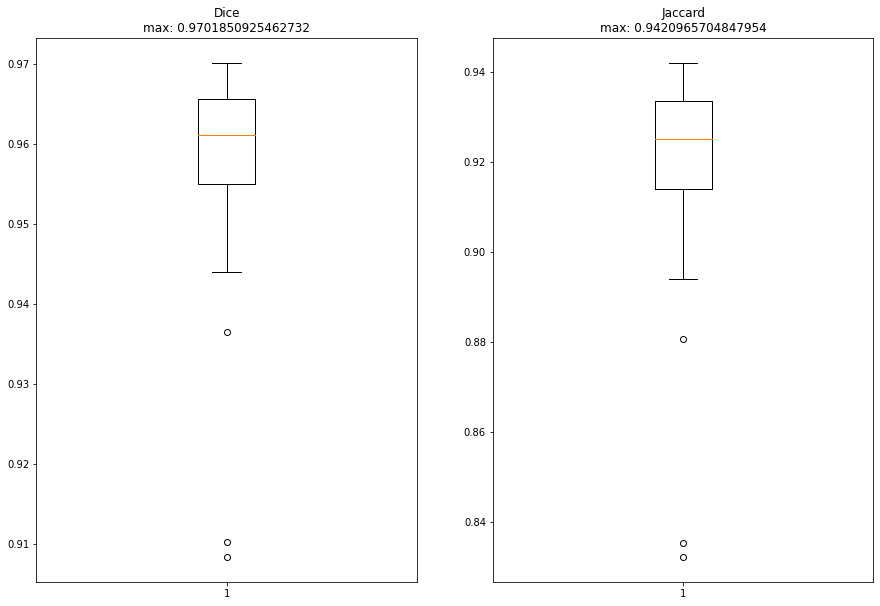

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(121)
plt.boxplot(DiceList)
plt.title('Dice\nmax: '+str(max(DiceList)))

plt.subplot(122)
plt.boxplot(JList)
plt.title('Jaccard\nmax: '+str(max(JList)))

print(np.mean(DiceList),np.mean(JList))

print(np.min(DiceList))

Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix

X = utils.load_data('./Dataset_3/Test/JPEGImages/', size = 224)
Y = utils.load_data('./Dataset_3/Test/SegmentationClass', size = 224, scale = False)[:,:,:,0]

Y_pred = model.predict(X)

Y_pred = np.where(Y_pred > 0.5, 1, 0)
Y = np.where(Y > 0.5, 1, 0)

cm = confusion_matrix(Y.reshape(-1), Y_pred.reshape(-1))

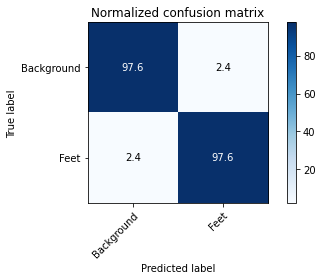

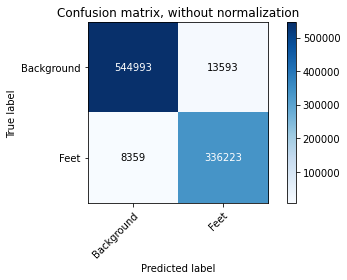

In [ ]:
utils.plot_confusion_matrix(Y.reshape(-1), Y_pred.reshape(-1),classes=['Background','Feet'])
utils.plot_confusion_matrix(Y.reshape(-1), Y_pred.reshape(-1),classes=['Background','Feet'], normalize=False)

### Guardado del Modelo para el Sistema Embebido (Raspberry)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert() 

In [ ]:
with open('TFLiteModel.tflite', 'wb') as f:
    f.write(tflite_model)